In [6]:
from preprocessing.main_preprocessing import preprocess
from preprocessing.dimensional_reduction import subsetSelection

X_train, X_test, Y_train, Y_test, columns = preprocess(
    path_to_folder='data',
    remove_outliers=True,
    imputing_missing_values=False,
    rescaling=True,
    pca=False,
    pls=False,
    forward_selection=False,
    backward_selection=False,
)

In [7]:
subsetSelection(X_train, Y_train, columns, typeSelection="Backward")

Backward Test
Total elapsed time: 124.5301206111908 seconds.


('Is Superhost',
 'Latitude',
 'Longitude',
 'Accomodates',
 'Bathrooms',
 'Bedrooms',
 'Guests Included',
 'Min Nights',
 'Neighborhood Group_Charlottenburg-Wilm.',
 'Neighborhood Group_Friedrichshain-Kreuzberg',
 'Neighborhood Group_Mitte',
 'Neighborhood Group_NeukÃ¶lln',
 'Neighborhood Group_Pankow',
 'Neighborhood Group_Reinickendorf',
 'Neighborhood Group_Tempelhof - SchÃ¶neberg',
 'Neighborhood Group_Treptow - KÃ¶penick',
 'Property Type_Apartment',
 'Property Type_Boutique hotel',
 'Property Type_Hostel',
 'Property Type_Hotel',
 'Property Type_Loft',
 'Property Type_Serviced apartment',
 'Room Type_Entire home/apt',
 'Room Type_Private room',
 'Dist_ALEXANDERPLATZ',
 'Dist_BRANDEBOURG',
 'Dist_GENDARMENMARKT')

In [8]:
subsetSelection(X_train, Y_train, columns, typeSelection="Forward")

Forward Test
Total elapsed time: 74.93661212921143 seconds.


['Accomodates',
 'Room Type_Entire home/apt',
 'Bathrooms',
 'Property Type_Hotel',
 'Bedrooms',
 'Dist_GENDARMENMARKT',
 'Guests Included',
 'Property Type_Loft',
 'Neighborhood Group_NeukÃ¶lln',
 'Is Superhost',
 'Neighborhood Group_Charlottenburg-Wilm.',
 'Property Type_Serviced apartment',
 'Dist_BRANDEBOURG',
 'Dist_ALEXANDERPLATZ',
 'Property Type_Boutique hotel',
 'Neighborhood Group_Mitte',
 'Neighborhood Group_Treptow - KÃ¶penick',
 'Min Nights',
 'Latitude',
 'Property Type_Hostel',
 'Property Type_Apartment',
 'Neighborhood Group_Lichtenberg',
 'Neighborhood Group_Marzahn - Hellersdorf',
 'Room Type_Shared room',
 'Property Type_House',
 'Neighborhood Group_Pankow',
 'Property Type_Condominium',
 'Room Type_Private room']

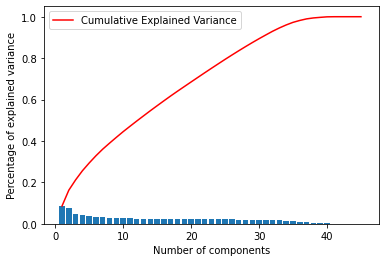

In [9]:
from preprocessing.pca import pcaSelection
import matplotlib.pyplot as plt
import numpy as np

# Principal Component Analysis (with the best num_features, see preprocessing/pca.py)
nb_cols = len(X_train[0])
pca_transformer = pcaSelection(nb_cols)
X_train = pca_transformer.fit_transform(X_train)


# Explained variance plot
plt.bar(range(1,len(pca_transformer.explained_variance_ratio_ )+1),pca_transformer.explained_variance_ratio_ )
plt.ylabel('Percentage of explained variance')
plt.xlabel('Number of components')
plt.plot(range(1,len(pca_transformer.explained_variance_ratio_ )+1),
         np.cumsum(pca_transformer.explained_variance_ratio_ ),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


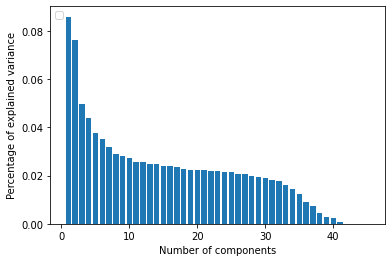

In [10]:
# Explained variance plot
plt.bar(range(1,len(pca_transformer.explained_variance_ratio_ )+1),pca_transformer.explained_variance_ratio_ )
plt.ylabel('Percentage of explained variance')
plt.xlabel('Number of components')
plt.legend(loc='upper left')
plt.show()